<h1 align="center" style="background-color: #303030; padding: 10px;">
  <img src="media/kinamic_logo.svg" width="100px">
</h1>

# Kinamic Challenge
This notebook analyzes the data obtained from web scraping the website [Books to Scrape](https://books.toscrape.com/).

## Index
- [1. Imports](#1.-Imports)
- [2. Load Data](#2.-Load-Data)
- [3. Clean Data 🧹](#3.-Clean-Data-🧹)
- [4. Validations 🤔](#4.-Validations)
- [5. Analysis and Insights 📈](#5.-Analysis-and-Insights)
- [6. Save Clean Data 🛢](#6.-Save-Clean-Data)

## 1. Imports

In [1]:
# Import the libraries we used in this analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

## 2. Load Data

In [2]:
# Get the DataFrame:
df = pd.read_json('data/raw/books.json', encoding='utf-8')
df

,title,category,price,rating
0,It's Only the Himalayas,Travel,£45.17,Two
1,Full Moon over Noahâs Ark: An Odyssey to Mou...,Travel,£49.43,Four
2,See America: A Celebration of Our National Par...,Travel,£48.87,Three
3,Vagabonding: An Uncommon Guide to the Art of L...,Travel,£36.94,Two
4,Under the Tuscan Sun,Travel,£37.33,Three
...,...,...,...,...
995,Why the Right Went Wrong: Conservatism--From G...,Politics,£52.65,Four
996,Equal Is Unfair: America's Misguided Fight Aga...,Politics,£56.86,One
997,Amid the Chaos,Cultural,£36.58,One
998,Dark Notes,Erotica,£19.19,Five


## 3. Clean Data 🧹

In [3]:
# Clean prices data:
df['price'] = df['price'].str.replace('£', '').astype(float)

# Clean rating:
rating_map = {
    'One': 1, 'Two': 2, 'Three': 3,
    'Four': 4, 'Five': 5
}
df['rating'] = df['rating'].map(rating_map)

# Clean titles:
df['title'] = df['title'].apply(lambda x: x.encode('latin1').decode('utf-8') if 'â' in x else x)

df

,title,category,price,rating
0,It's Only the Himalayas,Travel,45.17,2
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,Travel,49.43,4
2,See America: A Celebration of Our National Par...,Travel,48.87,3
3,Vagabonding: An Uncommon Guide to the Art of L...,Travel,36.94,2
4,Under the Tuscan Sun,Travel,37.33,3
...,...,...,...,...
995,Why the Right Went Wrong: Conservatism--From G...,Politics,52.65,4
996,Equal Is Unfair: America's Misguided Fight Aga...,Politics,56.86,1
997,Amid the Chaos,Cultural,36.58,1
998,Dark Notes,Erotica,19.19,5


## 4. Validations

In [4]:
def validate_books_df(df: pd.DataFrame) -> dict:
    """Validates a DataFrame of books scraped from a website.

    Args:
        df (pd.DataFrame): The DataFrame to validate.

    Returns:
        dict: A dictionary with validation status and issues found.
    """
    issues = {}

    # 1. Column presence check
    expected_columns = {'title', 'category', 'price', 'rating'}
    if not expected_columns.issubset(df.columns):
        issues['missing_columns'] = list(expected_columns - set(df.columns))

    # 2. Nulls check
    null_counts = df.isnull().sum()
    null_issues = null_counts[null_counts > 0].to_dict()
    if null_issues:
        issues['null_values'] = null_issues

    # 3. Data types check
    if not pd.api.types.is_numeric_dtype(df['price']):
        issues['price_dtype'] = 'Expected numeric'
    if not pd.api.types.is_numeric_dtype(df['rating']):
        issues['rating_dtype'] = 'Expected numeric'

    # 4. Price values check
    if (df['price'] < 0).any():
        issues['invalid_prices'] = 'Price contains negative values'

    # 5. Rating values check (expected 1 to 5)
    if not df['rating'].between(1, 5).all():
        issues['invalid_ratings'] = 'Rating must be between 1 and 5'

    # 6. Title and category empty strings
    for col in ['title', 'category']:
        if (df[col].astype(str).str.strip() == '').any():
            issues[f'invalid_{col}'] = f'{col} contains empty or whitespace-only strings'

    return {'is_valid': len(issues) == 0, 'issues': issues}

In [5]:
result = validate_books_df(df)
print(result)

{'is_valid': True, 'issues': {}}


### Don't found issues

## 5. Analysis and Insights

### 5.1 **Number of books per category:** Here we can see the categories that have the most books

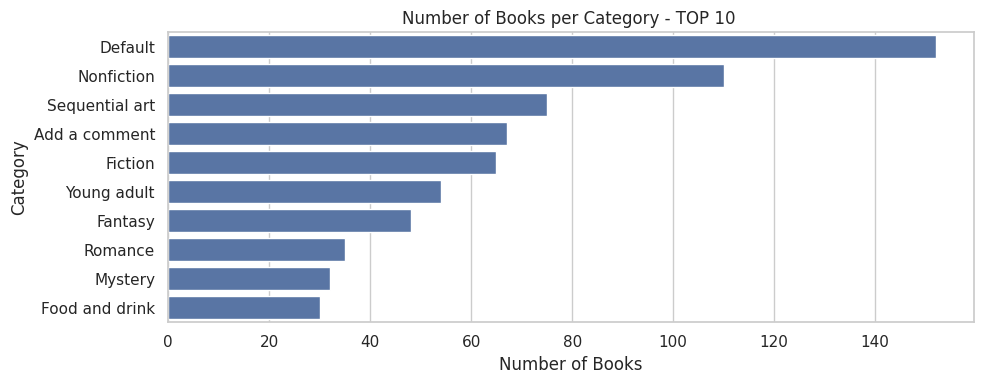

In [6]:
plt.figure(figsize=(10, 4))
category_counts = df['category'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Number of Books per Category - TOP 10 ')
plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

### 5.2 **Price per category (Average):** Which category has the most expensive books?

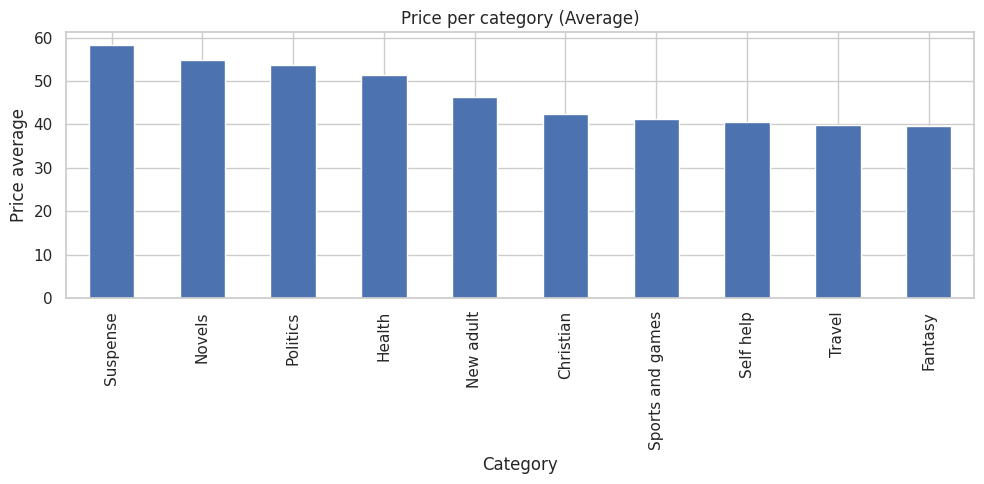

In [7]:
avg_price_per_category = df.groupby('category')['price'].mean().sort_values(ascending=False).head(10)

avg_price_per_category.plot(kind='bar')
plt.title('Price per category (Average)')
plt.ylabel('Price average')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

### 5.3 **Rating per category:** Categories with the best rating

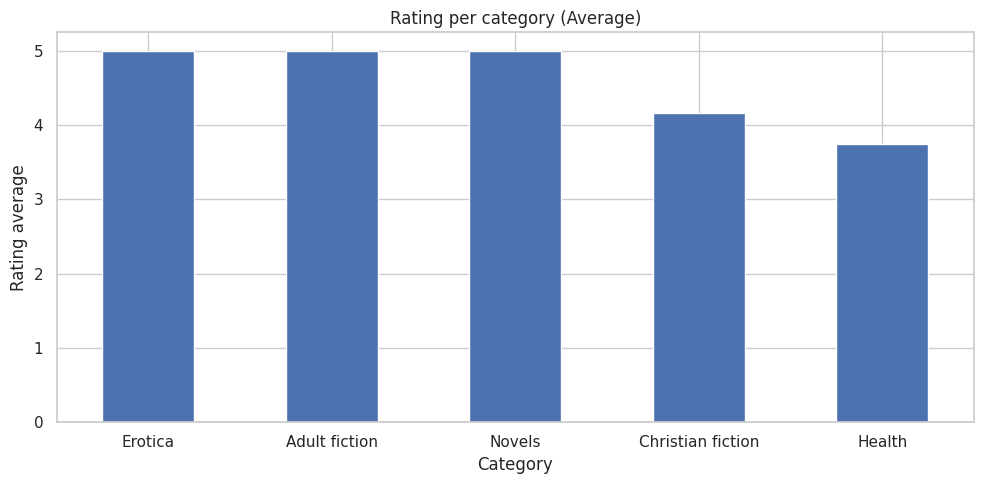

In [8]:
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

avg_rating_by_category.plot(kind='bar')
plt.title('Rating per category (Average)')
plt.xlabel('Category')
plt.ylabel('Rating average')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 5.4 Top 5 Most Expensive Books

In [9]:
top5_expensive_books = df.nlargest(5, 'price')
top5_expensive_books

,title,category,price,rating
191,The Perfect Play (Play by Play #1),Romance,59.99,3
271,Last One Home (New Beginnings #1),Fiction,59.98,3
845,Civilization and Its Discontents,Psychology,59.95,2
925,The Barefoot Contessa Cookbook,Food and drink,59.92,5
368,The Diary of a Young Girl,Nonfiction,59.90,3


### 5.5 Top 5 Cheapest Books

In [10]:
top5_cheapest_books = df.nsmallest(5, 'price')
top5_cheapest_books

,title,category,price,rating
781,An Abundance of Katherines,Young adult,10.00,5
804,The Origin of Species,Science,10.01,4
666,The Tipping Point: How Little Things Can Make ...,Add a comment,10.02,2
77,Patience,Sequential art,10.16,3
497,Greek Mythic History,Default,10.23,5


## 6. Save Clean Data

In [11]:
# Save data to a clean CSV
df.to_csv('data/processed/books.csv', sep=";",index=False)